In [10]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [12]:
print('Labels counts in y:', np.bincount(y))

print('Labels counts in y_train:', np.bincount(y_train))

print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [15]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [30]:
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    ## set up marker generator
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    ## Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    ## Highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

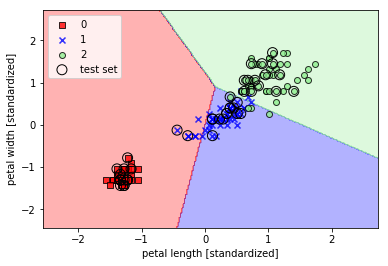

In [31]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

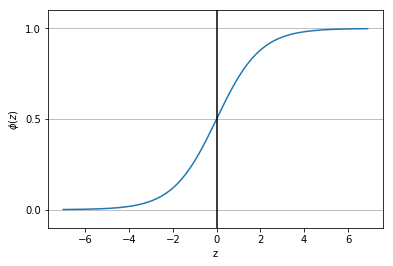

In [34]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

## Training a Logistic Regression Model

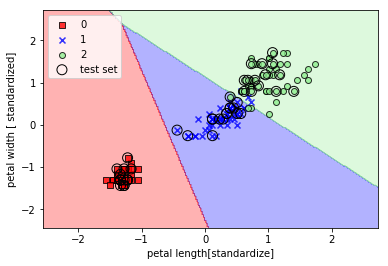

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, random_state = 1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier = lr,
                      test_idx = range(105,150))
plt.xlabel('petal length[standardize]')
plt.ylabel('petal width [ standardized]')
plt.legend(loc = 'upper left')
plt.show()

In [39]:
X_test_std.shape

(45, 2)

In [40]:
lr.predict_proba(X_test_std[:3,:])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [43]:
lr.predict_proba(X_test_std[:3,:]).sum(axis = 1)

array([1., 1., 1.])

In [44]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis = 1)

## This will return the column with the highest probability 
## in each row in the form of a list (Row 1, row 2, row 3)

array([2, 0, 0], dtype=int64)

## Dealing with the nonlinearity separable case

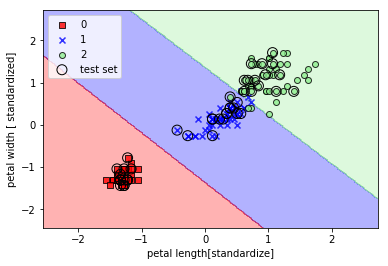

In [46]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier = svm,
                      test_idx = range(105,150))
plt.xlabel('petal length[standardize]')
plt.ylabel('petal width [ standardized]')
plt.legend(loc = 'upper left')
plt.show()

## Alternative implementation in scikit-learn

In [48]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss = 'perceptron', n_iter = 1000)
lr = SGDClassifier(loss = 'log', n_iter = 1000)
svm = SGDClassifier(loss = 'hinge', n_iter = 1000)

## Solving non-linear problems using kernel M

In [ ]:
np.logical_xor([True, True, False, False], [True, False, True, False])
## If you combine two tupples and they are equal the xor will return false

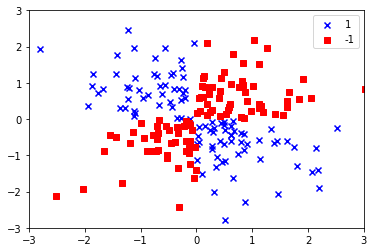

In [54]:
np.random.seed(1)

X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:,1] > 0)

y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c = 'b', marker = 'x',
            label = '1')

plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c = 'r', marker = 's',
            label = '-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

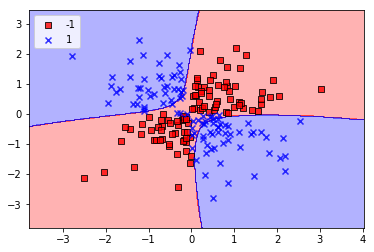

In [56]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()